# Medical Cost Personal Dataset

Let us import all the required libraries for the data preprocessing and visualisation 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

path = 'C:/Users/Hemanth/Documents/Python/Data preporcessing/Major/Datasets/medical_cost_personal.csv'
data = pd.read_csv(path)
print("")
print("Data Frame Shape is ", data.shape)
print("")


Data Frame Shape is  (1338, 7)



DataFrame contains 1338 column and 7 rows

In [6]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Let us check if the data set contains any missing values 

In [9]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

From the above output it is clear that there are no missing values in the dataset


Here is another way to check the missing values

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


As we see the result it is clear that there are no missing values in the data set.
Each column has the respected data type in them 

age      - int64 

sex      - object ( may be we can change this to category)

bmi      - float64

children - int64

smoker   - object ( may be we can change this to category)

region   - object

charges  - float64

## Converting sex and smoker columns to Categorial values

In [13]:
data['sex']=data['sex'].astype('category')
data['smoker']=data['smoker'].astype('category')

Double check if the change has been made

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null category
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null category
region      1338 non-null object
charges     1338 non-null float64
dtypes: category(2), float64(2), int64(2), object(1)
memory usage: 55.1+ KB


Let us see a bit more about the data frame


In [15]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Since the sex and smoker column consists of categorial data it is listed above.

Statistical calculation cannot be done on strings

# Data Visualisation 

Let me see how may smokers and non-smoker are there in the data frame

no     1064
yes     274
Name: smoker, dtype: int64


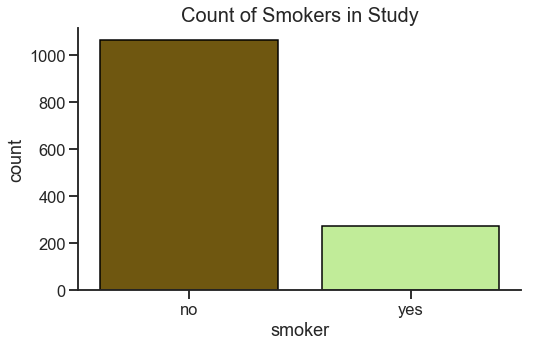

In [20]:
col_list = ["shit","pistachio"]
col_list_palette = sns.xkcd_palette(col_list)
sns.set_palette(col_list_palette)

sns.set(rc={"figure.figsize": (10,6)},
            palette = sns.set_palette(col_list_palette),
            context="talk",
            style="ticks")

# How many smokers are in this study?
sns.catplot(x = 'smoker', data=data, kind='count',height=5,aspect=1.5, edgecolor="black")
plt.title('Count of Smokers in Study', fontsize = 20)
print(data['smoker'].value_counts())

From the above bar graph it is clear that total number of non-smokers are more in the dataset

Let me split the dataframe based on their sex . so that the statistical calcluations are based on their sex from now

sex     female  male
smoker              
no         547   517
yes        115   159


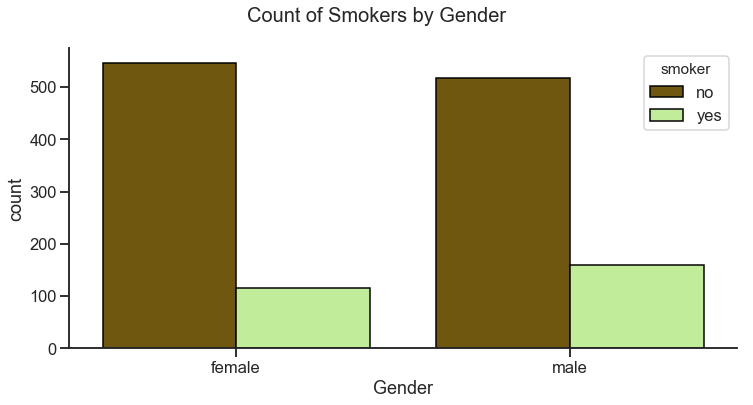

In [41]:
# Count of Smokers by Sex
sns.catplot(x ='sex',hue='smoker', data=data, kind="count",height=6, aspect=1.8,legend_out=False, edgecolor="black")
plt.suptitle('Count of Smokers by Gender', fontsize = 20)
plt.xlabel('Gender')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
print(pd.crosstab(data['smoker'],data['sex']))

In [16]:
male_data = data[data['sex']=='male']
female_data = data[data['sex']=='female']

Now let me the shape of newly created dataframes


In [17]:
print('male data shape'+ str(male_data.shape))
print('Female data shape'+ str(female_data.shape))

male data shape(676, 7)
Female data shape(662, 7)


From the above result we can see that 

Male   -  Total no : 676

Female  - Total no : 662







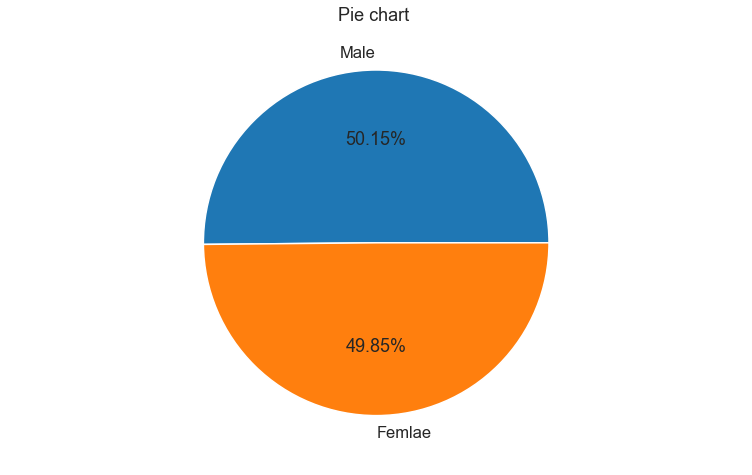

In [23]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['Male','Femlae']
students = [676,672]
ax.pie(students, labels = langs,autopct='%1.2f%%',colors = ["#1f77b4", "#ff7f0e"])
plt.title('Pie chart ')
plt.show()

# Now I'm Dividing the Male and Female dataframes into younger and older dataframes based on the mean values of age 

The reason why I'm doing this is for better understanding of the data .
Now we can see how much difference the younger ones are spending than the older on medical is known very easy for the visuals

In [24]:
print("Median value of Male age is:"+str(male_data['age'].mean()))
print("Median value of Femalemale age is:"+str(female_data['age'].mean()))

Median value of Male age is:38.917159763313606
Median value of Femalemale age is:39.503021148036254


So now divide the dataframes into 

younger_male < 38.917159763313606 (round the mean coz age in an int)

older_male > 38.917159763313606 (round the mean coz age in an int)

younger_female < 39.503021148036254 (round the mean coz age in an int)

older_female > 39.503021148036254 (round the mean coz age in an int)

In [25]:
male_smoking_young = data[(data['age']<38) & (data['sex']=='male') & (data['smoker']=='yes')]
male_nonsmoking_young = data[(data['age']<38) & (data['sex']=='male') & (data['smoker']=='no')]
male_smoking_older = data[(data['age']>38) & (data['sex']=='male') & (data['smoker']=='yes')]
male_nonsmoking_older = data[(data['age']>38) & (data['sex']=='male') & (data['smoker']=='no')]

female_smoking_young = data[(data['age']<38) & (data['sex']=='female') & (data['smoker']=='yes')]
female_nonsmoking_young = data[(data['age']<38) & (data['sex']=='female') & (data['smoker']=='no')]
female_smoking_older =  data[(data['age']>38) & (data['sex']=='female') & (data['smoker']=='yes')]
female_nonsmoking_older = data[(data['age']>38) & (data['sex']=='female') & (data['smoker']=='no')]
                               

Now let us see the average amount of money spent by each dataframe

In [31]:
print('Younger boys who smoke and their avg spending on medical is = ' + str(male_smoking_young['charges'].mean()) +' $')
print("")
print('Younger boys who dont smoke and their avg spending on medical is = ' + str(male_nonsmoking_young['charges'].mean()) +' $')
print("")
print('Older men who smoke and their avg spending on medical is = ' + str(male_smoking_older['charges'].mean()) +' $')
print("")
print('Older men who dont smoke and their avg spending on medical is = ' + str(male_nonsmoking_older['charges'].mean()) +' $')
print("")

Younger boys who smoke and their avg spending on medical is = 29668.952685316453 $

Younger boys who dont smoke and their avg spending on medical is = 4798.745074897121 $

Older men who smoke and their avg spending on medical is = 36564.894164487174 $

Older men who dont smoke and their avg spending on medical is = 11188.352947424235 $



In [32]:
print('Younger gilrs who smoke and their avg spending on medical is ='+ str(female_smoking_young['charges'].mean())+' $')
print("")
print('Younger gilrs who dont smoke and their avg spending on medical is ='+ str(female_nonsmoking_young['charges'].mean())+' $')
print("")
print('Older gilrs who smoke and their avg spending on medical is ='+ str(female_smoking_older['charges'].mean())+' $')
print("")
print('Older gilrs who dont smoke and their avg spending on medical is ='+ str(female_nonsmoking_older['charges'].mean())+' $')
print("")

Younger gilrs who smoke and their avg spending on medical is =27652.377414035076 $

Younger gilrs who dont smoke and their avg spending on medical is =5154.336350730616 $

Older gilrs who smoke and their avg spending on medical is =33653.43205465518 $

Older gilrs who dont smoke and their avg spending on medical is =11926.056861314872 $



Let us visually see the average spedings 

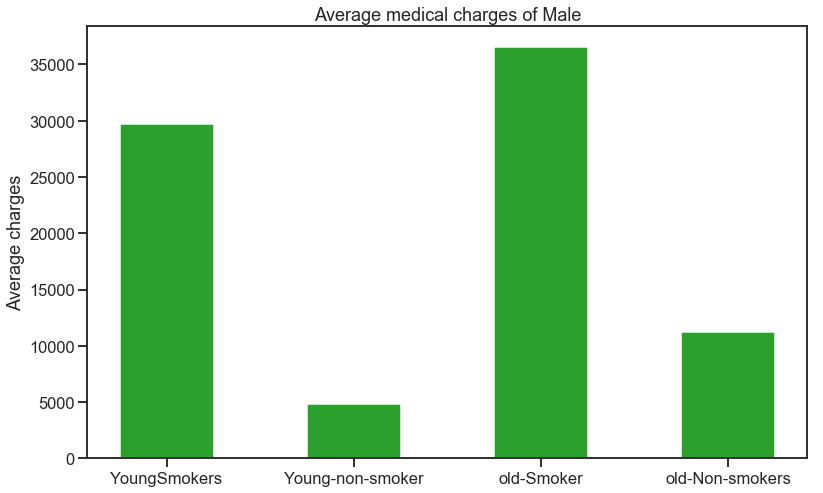

In [37]:
values = [(male_smoking_young['charges'].mean()),(male_nonsmoking_young['charges'].mean()),(male_smoking_older['charges'].mean()),(male_nonsmoking_older['charges'].mean())]
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = ['YoungSmokers', 'Young-non-smoker', 'old-Smoker', 'old-Non-smokers']
ax.set_ylabel('Average charges')
ax.set_title('Average medical charges of Male')
ax.bar(names,values,width = 0.5,color=["#2ca02c"])
plt.show()

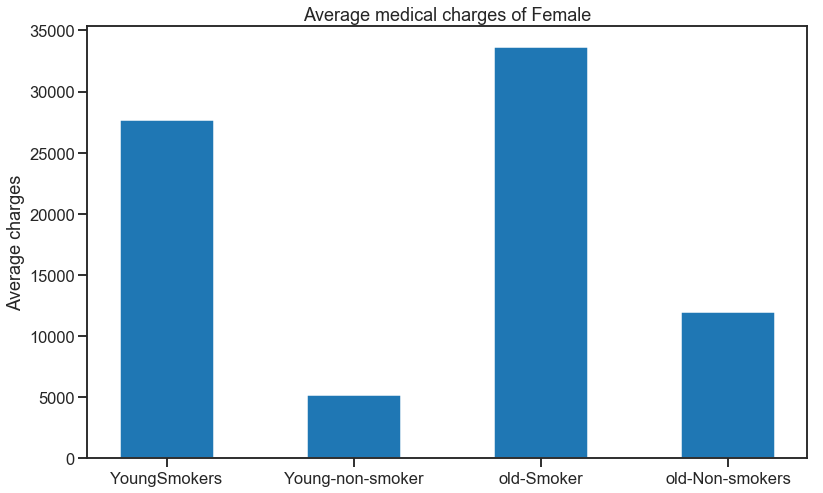

In [35]:
values = [(female_smoking_young['charges'].mean()),(female_nonsmoking_young['charges'].mean()),(female_smoking_older['charges'].mean()),(female_nonsmoking_older['charges'].mean())]
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = ['YoungSmokers', 'Young-non-smoker', 'old-Smoker', 'old-Non-smokers']
ax.set_ylabel('Average charges')
ax.set_title('Average medical charges of Female')
ax.bar(names,values,width = 0.5,color=["#1f77b4"])
plt.show()

# Let us see the results based on their regions

In [39]:
print(data['region'].unique())

['southwest' 'southeast' 'northwest' 'northeast']


As we can see there are only 4 regions given in the dataset


 Let me spilt the data based on regions

In [43]:
southwest = data[data['region']=='southwest']
southeast = data[data['region']=='southeast']
northeast = data[data['region']=='northeast']
northwest = data[data['region']=='northwest']

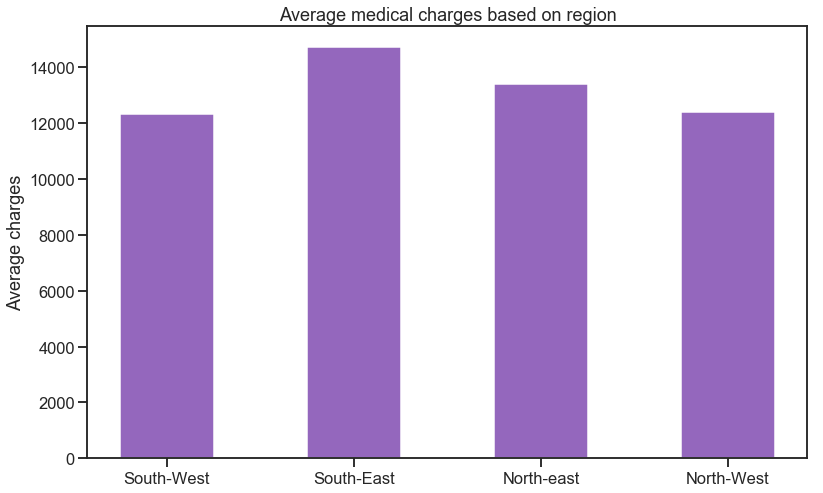

In [45]:
values = [(southwest['charges'].mean()),(southeast['charges'].mean()),(northeast['charges'].mean()),(northwest['charges'].mean())]
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = ['South-West','South-East','North-east','North-West']
ax.set_ylabel('Average charges')
ax.set_title('Average medical charges based on region')
ax.bar(names,values,width = 0.5,color=["#9467bd"])
plt.show()

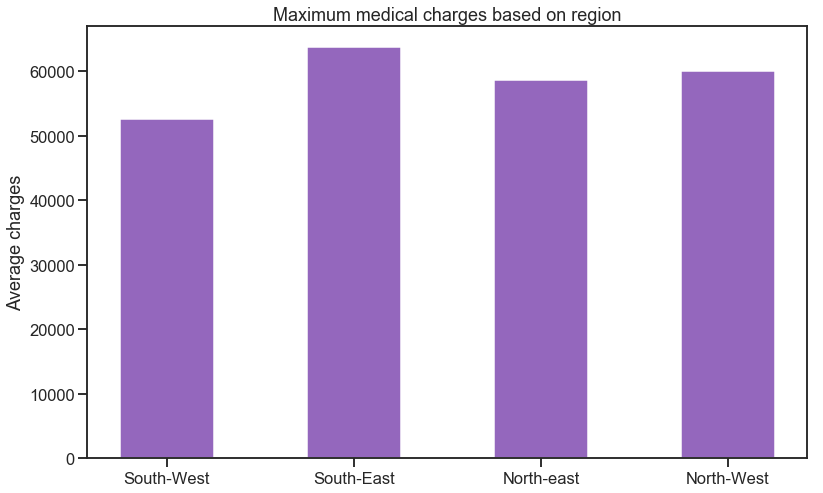

In [46]:
values = [(southwest['charges'].max()),(southeast['charges'].max()),(northeast['charges'].max()),(northwest['charges'].max())]
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = ['South-West','South-East','North-east','North-West']
ax.set_ylabel('Average charges')
ax.set_title('Maximum medical charges based on region')
ax.bar(names,values,width = 0.5,color=["#9467bd"])
plt.show()

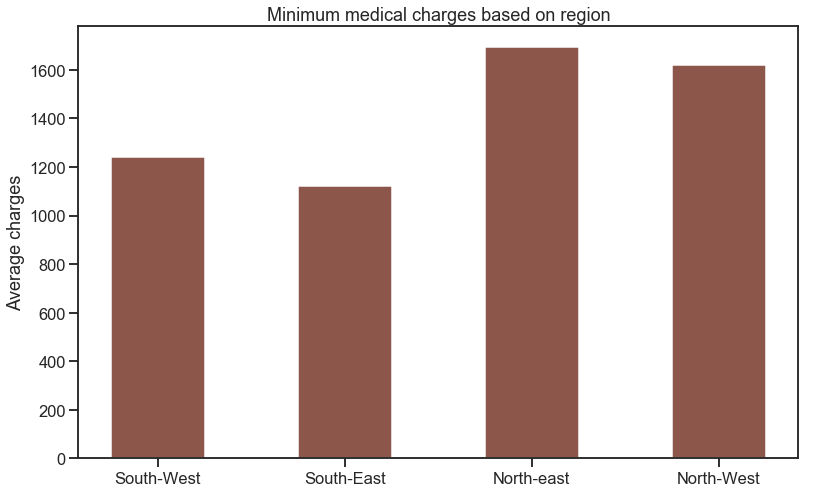

In [48]:
values = [(southwest['charges'].min()),(southeast['charges'].min()),(northeast['charges'].min()),(northwest['charges'].min())]
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = ['South-West','South-East','North-east','North-West']
ax.set_ylabel('Average charges')
ax.set_title('Minimum medical charges based on region')
ax.bar(names,values,width = 0.5,color=["#8c564b"])
plt.show()

From the above bar charts we can tell that South-east people are the ones who are paying more on thier medical charges

### Now let us see medical costs and body mass index by smokers

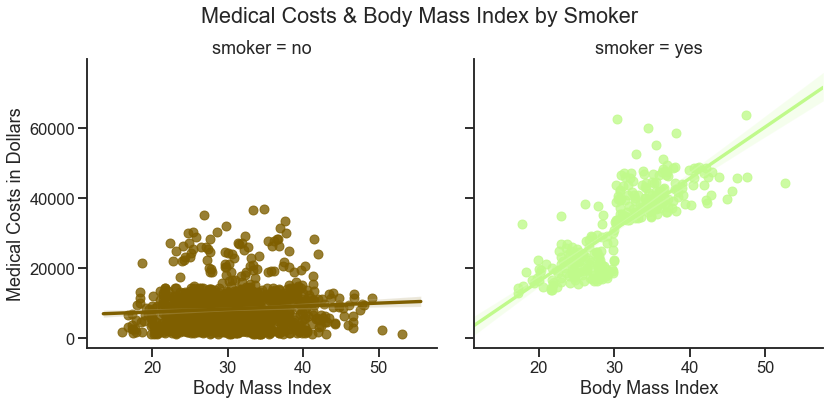

In [49]:
#------------------------------------------------------#
#####   Medical Costs & Body Mass Index by Smoker  #####
#------------------------------------------------------#

a = sns.lmplot(x="bmi", y="charges", col="smoker",
           hue="smoker", data=data, height = 6)
plt.suptitle('Medical Costs & Body Mass Index by Smoker')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
a.set_axis_labels('Body Mass Index', 'Medical Costs in Dollars')

### Body Mass and associated medical costs

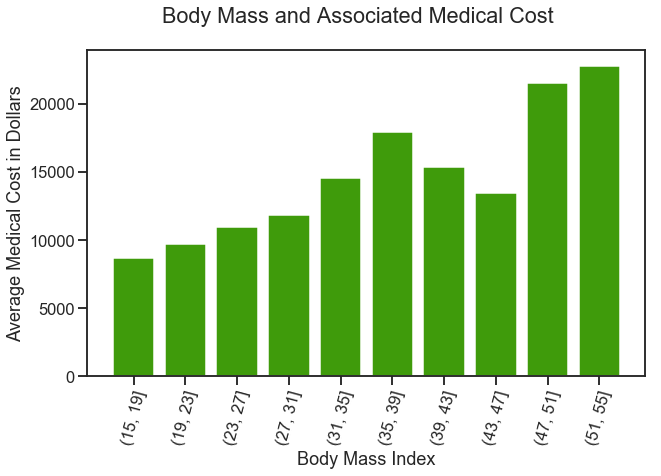

In [50]:
#------------------------------#
####  binning the bmi data  ####
#------------------------------#

mnb = round(min(data.bmi)-1)
mxb = round(max(data.bmi)+2)
bm = np.linspace(mnb, mxb, num=11).astype(int)
data['bmi_binned'] = pd.cut(data['bmi'], bins = bm); data.head(10)
# Group by the bin and calculate averages
avg_bmi  = data.groupby('bmi_binned').mean()

#------------------------------------------#
####  Body Mass Index & Medical Costs   ####
#------------------------------------------#

plt.bar(avg_bmi.index.astype(str), avg_bmi['charges'], color='#3f9b0b')
plt.xticks(rotation = 75); plt.xlabel('Body Mass Index'); plt.ylabel('Average Medical Cost in Dollars')
plt.suptitle('Body Mass and Associated Medical Cost');

# Simple statistics from our data

In [51]:
#--------------------------------------------------#
####  Age Distribution of Study Participants   #####
#--------------------------------------------------#

print('#####  Age Statistics  #######\n')
print('      Minimum     ',int(data['age'].min()))
print('      Average     ',int(data['age'].mean()))
print('      Median      ', int(np.median(data['age'])))
print('      Max         ',int(data['age'].max()))
print('   Std Deviation  ', int(data['age'].std()))

#####  Age Statistics  #######

      Minimum      18
      Average      39
      Median       39
      Max          64
   Std Deviation   14


In [52]:
####  Body Mass Distribution of Study Participants   #####
#--------------------------------------------------------#

# Distribution of Body Mass
print('#####  Body Mass Statistics  #######\n')
print('      Minimum     ',int(data['bmi'].min()))
print('      Average     ',int(data['bmi'].mean()))
print('      Median      ', int(np.median(data['bmi'])))
print('      Max         ',int(data['bmi'].max()))
print('   Std Deviation  ', int(data['bmi'].std()))

#####  Body Mass Statistics  #######

      Minimum      15
      Average      30
      Median       30
      Max          53
   Std Deviation   6


In [53]:
print('################################################')
print('############     Report Summary    #############')
print('################################################\n')
print('Average Age')
print('--------------')
print('Smoker      %0.0f' % data[data['smoker']=='yes']['age'].mean())
print('Non-Smoker  %0.0f' %data[data['smoker']=='no']['age'].mean(),'\n')
print('Average Body Mass')
print('--------------------')
print('Smoker      %0.0f' % data[data['smoker']=='yes']['bmi'].mean())
print('Non-Smoker  %0.0f' % data[data['smoker']=='no']['bmi'].mean(),'\n')
print('Average Medical Cost by Gender')
print('-----------------------------')
print('Female      ${:,.0f}'.format(data[data['sex']=='female']['charges'].mean()))
print('Male        ${:,.0f}'.format(data[data['sex']=='male']['charges'].mean()), '\n')
print('Average Medical Cost by Smoker')
print('--------------------------------')
print('Non-Smoker   ${:,.0f}'.format(data[data['smoker']=='no']['charges'].mean()))
print('Smoker      ${:,.0f}'.format(data[data['smoker']=='yes']['charges'].mean()))


################################################
############     Report Summary    #############
################################################

Average Age
--------------
Smoker      39
Non-Smoker  39 

Average Body Mass
--------------------
Smoker      31
Non-Smoker  31 

Average Medical Cost by Gender
-----------------------------
Female      $12,570
Male        $13,957 

Average Medical Cost by Smoker
--------------------------------
Non-Smoker   $8,434
Smoker      $32,050


In [72]:
temp = {"no" : 0, "yes" : 1}
data.smoker = [temp[item] for item in data.smoker]

print('##############################################')
print('###########    Correlations       ############')
print('##############################################')
print('\n')
print('Cost to Smoker   ', round(data['charges'].corr(data['smoker'])*100,1),'%')
print('Cost to Age      ', round(data['charges'].corr(data['age'])*100,1),'%')
print('Cost to Body Mass ', round(data['charges'].corr(data['bmi'])*100,1),'%')

##############################################
###########    Correlations       ############
##############################################


Cost to Smoker    78.7 %
Cost to Age       29.9 %
Cost to Body Mass  19.8 %


The above correlation is used for linear regression models 
